# Motivational Example


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [1]:
import numpy as np

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
from keras.datasets import mnist

https://keras.io/datasets/

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

## NN Architecture

https://keras.io/getting-started/sequential-model-guide/

In [7]:
from keras import models
from keras import layers

In [8]:
model = models.Sequential()

In [9]:
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [10]:
model.add(layers.Dense(units=10,
                       activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Data Prep

In [12]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [13]:
x_train_input.dtype

dtype('uint8')

In [14]:
x_train_input.min()

0

In [15]:
x_train_input.max()

255

In [16]:
x_train_input = x_train_input.astype('float32') / 255

In [17]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [18]:
x_test_input = x_test_input.astype('float32') / 255

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Loss Function and Optimiser

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train_input[:10000]
x_train_1 = x_train_input[10000:]

In [22]:
y_val = y_train[:10000]
y_train_1 = y_train[10000:]

In [23]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=10,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 40us/step - loss: 0.3379 - acc: 0.9033 - val_loss: 0.2264 - val_acc: 0.9365
Epoch 2/10
50000/50000 [==============================] - 1s 16us/step - loss: 0.1436 - acc: 0.9588 - val_loss: 0.1198 - val_acc: 0.9674
Epoch 3/10
50000/50000 [==============================] - 1s 15us/step - loss: 0.0961 - acc: 0.9721 - val_loss: 0.1050 - val_acc: 0.9688
Epoch 4/10
50000/50000 [==============================] - 1s 15us/step - loss: 0.0701 - acc: 0.9791 - val_loss: 0.0972 - val_acc: 0.9720
Epoch 5/10
50000/50000 [==============================] - 1s 15us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0849 - val_acc: 0.9742
Epoch 6/10
50000/50000 [==============================] - 1s 16us/step - loss: 0.0414 - acc: 0.9879 - val_loss: 0.0774 - val_acc: 0.9767
Epoch 7/10
50000/50000 [==============================] - 1s 15us/step - loss: 0.0322 - acc: 0.9905 - val_loss: 0.0934 - val_acc

test the model on test set

In [24]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

10000/10000 [==============================] - 0s 26us/step


In [25]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9791


In [26]:
history_dict = history.history

In [27]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Visualisation Performance

In [28]:
import matplotlib.pyplot as plt

In [29]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

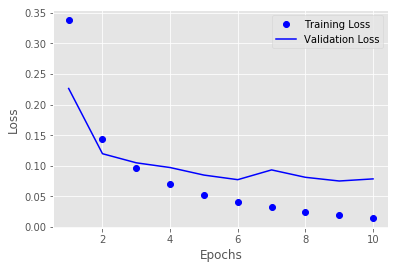

In [30]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

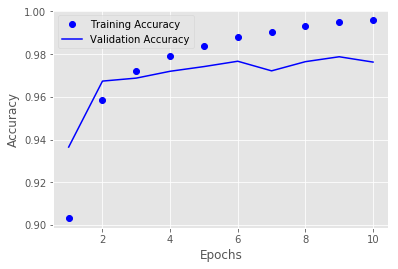

In [31]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', 
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***